In [313]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [314]:
import os
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils
import timeit
import matplotlib
import matplotlib.pyplot as plt
from keras import callbacks 

In [315]:
os.getcwd()
!mkdir MyDrive   # make a directory called MyDrive, otherwise sometimes "My Drive" causes problem!!
!mount --bind /content/drive/My\ Drive /content/MyDrive

mkdir: cannot create directory ‘MyDrive’: File exists


In [316]:
os.chdir("/content/MyDrive/AI_VAR/LAB2/")

In [317]:
!pip install keras

In [318]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [319]:
def CNN_model(input_shape, num_classes):

    # Application 2 - Step 6 - Initialize the sequential model
    model = Sequential()

    #TODO - Application 2 - Step 6 - Create the first hidden layer as a convolutional layer
    model.add(keras.Input(shape=input_shape))  # 28x28x1 images
    model.add(keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu"))

    #TODO - Application 2 - Step 6 - Define the pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #TODO - Application 2 - Step 6 - Define the Dropout layer
    model.add(Dropout(0.2)) #20% dropout

    #TODO - Application 2 - Step 6 - Define the flatten layer
    model.add(Flatten())

    #TODO - Application 2 - Step 6 - Define a dense layer of size 128
    model.add(Dense(units = 128, activation = "relu"))

    #TODO - Application 2 - Step 6 - Define the output layer
    model.add(Dense(10, activation='softmax'))

    #TODO - Application 2 - Step 7 - Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [320]:
def trainAndPredictCNN(X_train, Y_train, X_test, Y_test):

    #TODO - Application 2 - Step 3 - reshape the data to be of size [samples][width][height][channels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') 
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') 

    #TODO - Application 2 - Step 4 - normalize the input values
    X_train = X_train / 255 
    X_test = X_test / 25

    #TODO - Application 2 - Step 5 - Transform the classes labels into a binary matrix
    # one hot encode outputs 
    Y_train = np_utils.to_categorical(Y_train) 
    Y_test = np_utils.to_categorical(Y_test) 
    num_classes = Y_test.shape[1]

    epochs = 20
    #Application 2 - Step 6 - Call the cnn_model function
    model = CNN_model((28,28,1), num_classes)

    # call early stopping
    earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 


    start = timeit.timeit()
    #TODO - Application 2 - Step 8 - Train the model
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=200, callbacks =[earlystopping]) 
    end = timeit.timeit()
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy)+1)
    # plot metrics
    plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label = 'validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'validation val_loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()


    #TODO - Application 2 - Step 8 - System evaluation - compute and display the prediction error
    scores = model.evaluate(X_test, Y_test, verbose=0) 
    print("CNN Error: {:.2f}".format(100-scores[1]*100)) 
    print("Convergence time: ", round(end-start, 5))

    return

300/300 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8974 - val_loss: 1.2341 - val_accuracy: 0.9303
CNN Error: 6.97
Convergence time:  0.00052


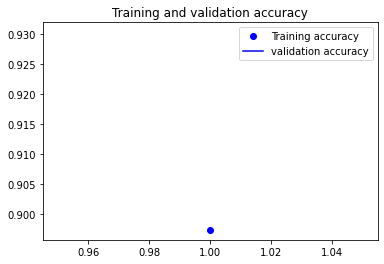

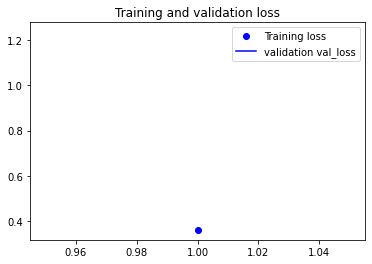

<Figure size 432x288 with 0 Axes>

In [321]:
def main():
  trainAndPredictCNN(X_train, Y_train, X_test, Y_test)
  
  return

if __name__ == '__main__':
    main()